In [ ]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.3.0


## 1. Import fashion mnist data

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 2. Explore the data

In [ ]:
train_images.shape  #60,000 images with each image having 28 X 28 pixels

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape   #10,000 images with each image having 28 x 28 pixel

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

## 3. Preprocess the data

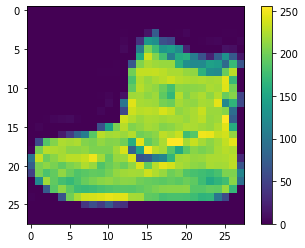

In [ ]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Preprocess the images
train_images = train_images / 255.0

test_images = test_images / 255.0

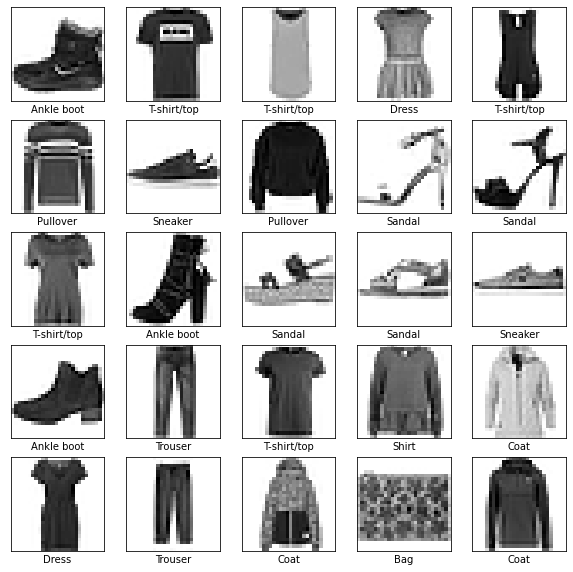

In [ ]:
#Display the first 25 images from training set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

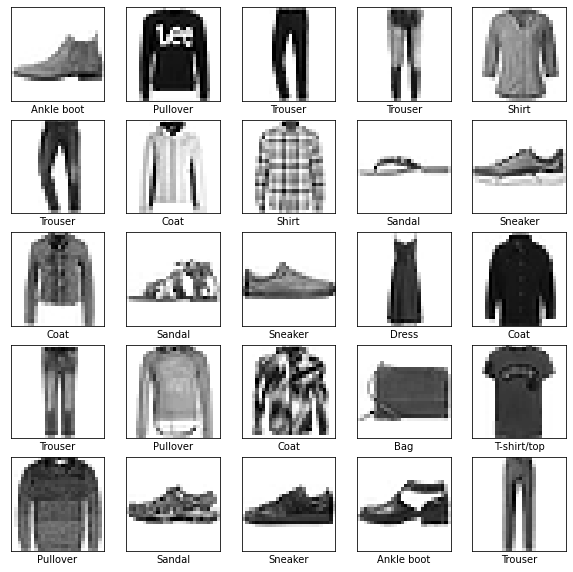

In [ ]:
#Display first 25 images from testing set
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[test_labels[i]])
plt.show()

## 4. Build the model

#### 4.1 Set up the layers

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dense(10)
])

#### 4.2 Compile the model

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

## 5. Train the Model

#### 5.1 Feed the model

In [ ]:
history = model.fit(train_images, train_labels, validation_split=0.1, epochs=10, shuffle=True)

Epoch 1/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1356 - accuracy: 0.9491 - val_loss: 0.2197 - val_accuracy: 0.9185
Epoch 2/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1311 - accuracy: 0.9509 - val_loss: 0.2355 - val_accuracy: 0.9188
Epoch 3/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1276 - accuracy: 0.9525 - val_loss: 0.2336 - val_accuracy: 0.9172
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1256 - accuracy: 0.9526 - val_loss: 0.2301 - val_accuracy: 0.9163
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1251 - accuracy: 0.9524 - val_loss: 0.2391 - val_accuracy: 0.9167
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1220 - accuracy: 0.9548 - val_loss: 0.2402 - val_accuracy: 0.9152
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 0.1183 - accuracy: 0.9550 - val_loss: 0.2572 - val_accuracy:

#### 5.2 Evaluate accuracy

In [ ]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 0.4572 - accuracy: 0.8827

Test accuracy: 0.8827000260353088


Model is overfitting!!

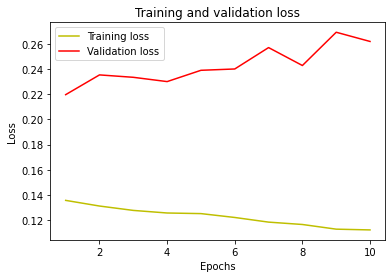

In [ ]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

We see that the training loss decreases but the validation loss increases and there's extremely high variance - overfitting!!!!

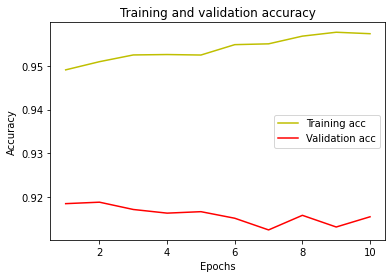

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#### 5.3 Model with dropout

In [ ]:
#build the model
model_with_dropout = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),   #Convert the 60,000 x 28 x 28 to 60,000 x 784
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.5),
    keras.layers.Dense(10, activation='softmax')
])

#compile the model
model_with_dropout.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

#train the model
history2 = model_with_dropout.fit(train_images, train_labels, validation_split=0.1, epochs=10)


Epoch 1/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.7624 - accuracy: 0.7059 - val_loss: 1.6667 - val_accuracy: 0.7942
Epoch 2/10
1688/1688 [==============================] - 5s 3ms/step - loss: 1.6918 - accuracy: 0.7703 - val_loss: 1.6577 - val_accuracy: 0.8027
Epoch 3/10
1688/1688 [==============================] - 4s 3ms/step - loss: 1.6769 - accuracy: 0.7840 - val_loss: 1.6371 - val_accuracy: 0.8242
Epoch 4/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.6578 - accuracy: 0.8038 - val_loss: 1.6453 - val_accuracy: 0.8158
Epoch 5/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.6543 - accuracy: 0.8065 - val_loss: 1.6272 - val_accuracy: 0.8342
Epoch 6/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.6475 - accuracy: 0.8131 - val_loss: 1.6271 - val_accuracy: 0.8343
Epoch 7/10
1688/1688 [==============================] - 4s 2ms/step - loss: 1.6465 - accuracy: 0.8141 - val_loss: 1.6279 - val_accuracy:

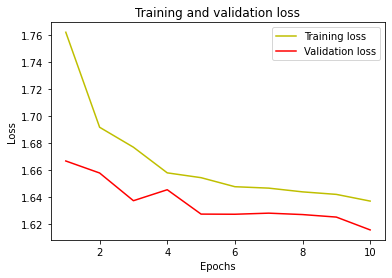

In [ ]:
loss = history2.history['loss']
val_loss = history2.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

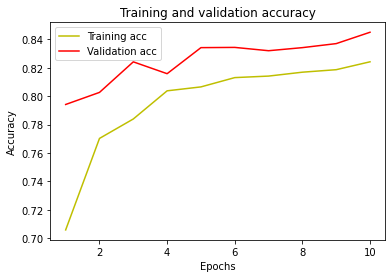

In [ ]:
acc = history2.history['accuracy']
val_acc = history2.history['val_accuracy']
plt.plot(epochs, acc, 'y', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Training and validation accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
#evaluate the accuracy
test_loss, test_acc = model_with_dropout.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

313/313 - 0s - loss: 1.6238 - accuracy: 0.8368

Test accuracy: 0.8367999792098999


Accuracy may be lower than the model without dropout, however, model with dropout converged faster than the model without dropout!

#### 5.3 Make predictions

In [ ]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([1.2663570e-06, 1.1984826e-08, 7.2245491e-08, 6.9705948e-09,
       2.8994569e-05, 2.6998220e-03, 1.3627812e-04, 9.5426198e-03,
       3.2251601e-06, 9.8758775e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0])

9

So, the model is most confident that this image is an ankle boot, or class_names[9]. Examining the test label shows that this classification is correct:


In [ ]:
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

#### 5.4 Verify predictions

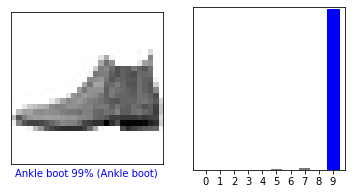

In [ ]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

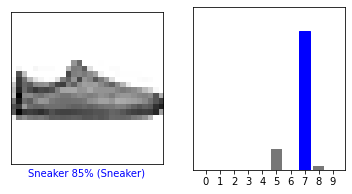

In [ ]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

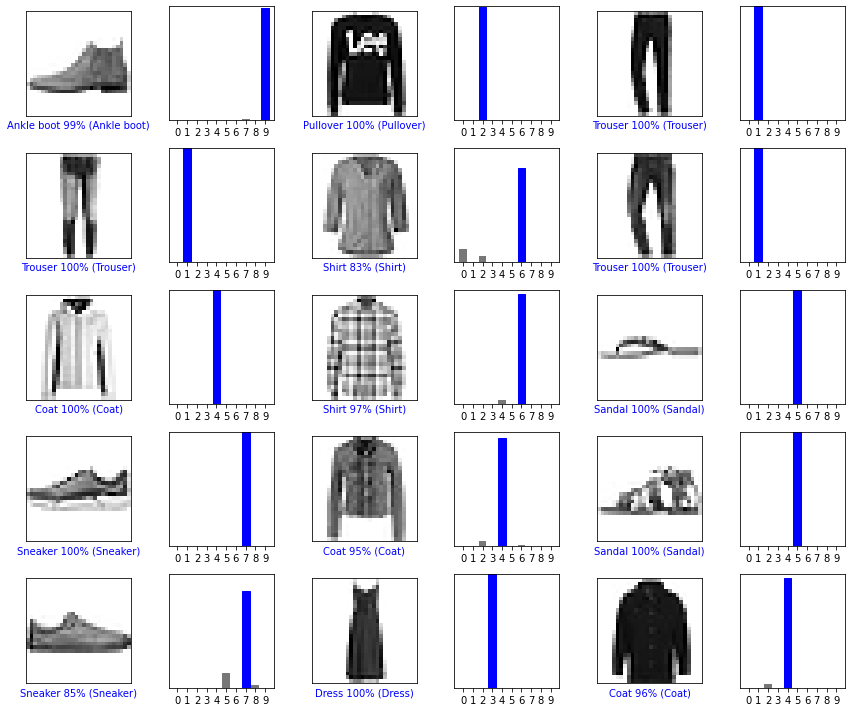

In [ ]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

## 6. Use the trained model

In [ ]:
# Grab an image from the test dataset.
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[1.1559219e-04 1.3474130e-11 9.9612695e-01 5.1938707e-11 3.5801211e-03
  5.8467269e-14 1.7746387e-04 1.4020533e-18 4.0499506e-09 1.4636598e-12]]


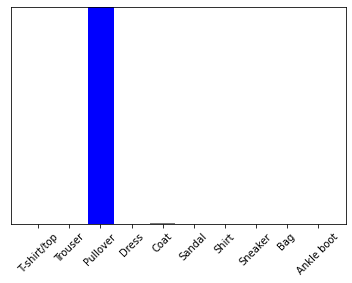

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)

In [ ]:
np.argmax(predictions_single[0])

2